In [1]:
import numpy as np
X = np.array([[1, 2], [1.5, 3], [3.5, 4], [4, 5], [6, 2], [7, 5], [9, 4], [8, 2]])
y = [0, 0, 0, 0, 1, 1, 1, 1]

In [2]:
#선형 SVM 모형
from sklearn.svm import SVC
model = SVC(kernel = 'linear')
#model = SVC()  #default='rbf'
model.fit(X, y)

SVC(kernel='linear')

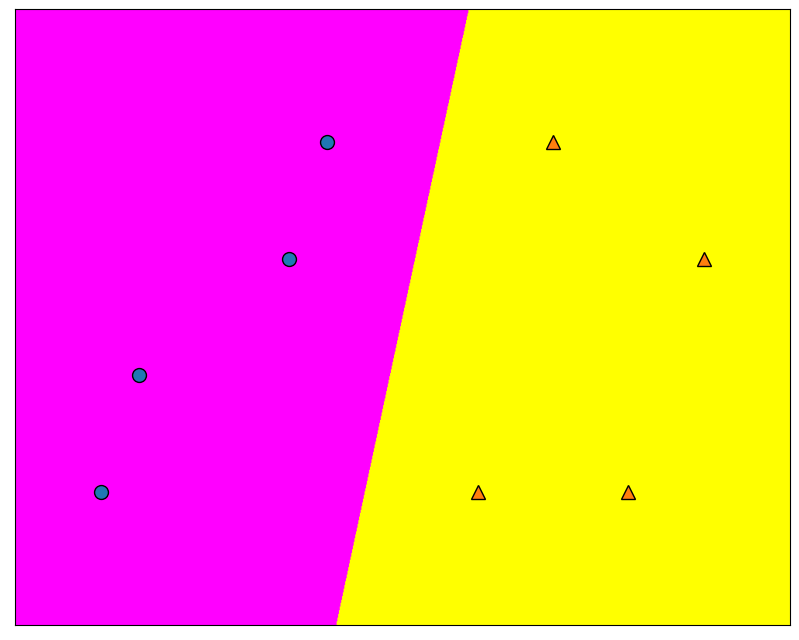

In [3]:
import mglearn
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
mglearn.plots.plot_2d_classification(model, X, cm='spring')
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

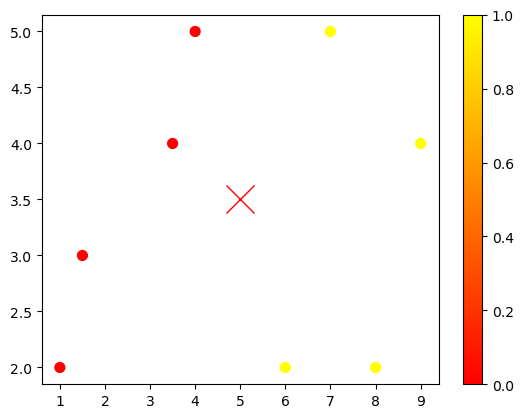

In [10]:
#X 데이터는 어느 클래스로 분류되는가?
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([5], [3.5], 'x', color='red', markersize=20)
plt.colorbar()

In [12]:
#모델에서의 X데이터 예측값
print(model.predict([[5, 3.5]]))

[0]


In [13]:
#서포트 벡터 샘플
print(model.support_vectors_)

[[4. 5.]
 [6. 2.]
 [7. 5.]]


In [14]:
#서포트 벡터의 인덱스
print(model.support_)

[3 4 5]


In [6]:
def plot_svc(model, ax=None):
    if ax == None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # 그래프 그리드
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x) # 정방행렬 생성
    xy = np.vstack([X.ravel(), Y.ravel()]).T # 1차원으로 만들고 행렬 전치
    
    # 판별함수에 입력
    P = model.decision_function(xy).reshape(X.shape)
    
    # decision boundary와 margins
    # 등고선, 2차원 넘파이 배열
    ax.contour(X, Y, P, levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    
    # 서포트 벡터 출력
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=200)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

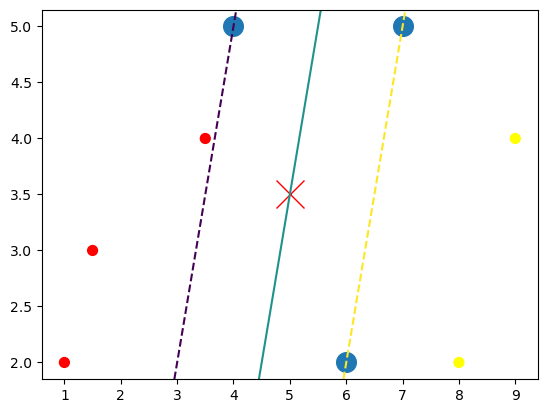

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([5], [3.5], 'x', color='red', markersize=20)
plot_svc(model)